In [2]:
#importing libraries 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [3]:
#implementing logistic regression 

class LogisticRegression:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def _scale_features(self, X, training=True):
        if training:
            self.means = np.mean(X, axis=0)
            self.stds = np.std(X, axis=0)
        return (X - self.means) / (self.stds + 1e-8)  # avoid error division by zero 
    
    def fit(self, X, y, num_iterations=1000):
        X = self._scale_features(X, training=True)
        
        self.m, self.n = X.shape
        X = np.hstack((np.ones((self.m, 1)), X)) # adding the bias 
        self.theta = np.zeros(self.n + 1)
        
        for i in range(num_iterations):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / self.m
            self.theta -= self.learning_rate * gradient
        
        return self
    
    def predict(self, X):
        X = self._scale_features(X, training=False)
        m = X.shape[0]
        X = np.hstack((np.ones((m, 1)), X))
        z = np.dot(X, self.theta)
        h = self.sigmoid(z)
        return (h >= 0.5).astype(int)


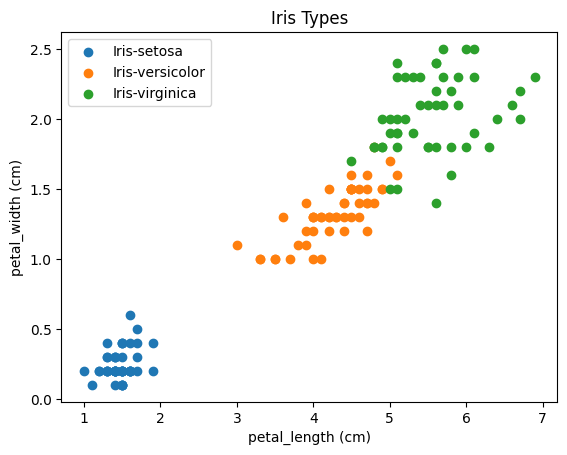

In [7]:
# importing data 

data = pd.read_csv('iris.csv')

data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# List of suppported Iris classes.
iris_types = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Pick the Iris parameters for consideration.
x_axis = 'petal_length'
y_axis = 'petal_width'

# Plot the scatter for every type of Iris.
for iris_type in iris_types:
    plt.scatter(
        data[x_axis][data['class'] == iris_type],
        data[y_axis][data['class'] == iris_type],
        label=iris_type
    )

# Plot the data.    
plt.xlabel(x_axis + ' (cm)')
plt.ylabel(y_axis + ' (cm)')
plt.title('Iris Types')
plt.legend()
plt.show()

Accuracy: 100.00%
Accuracy V: 94.00%


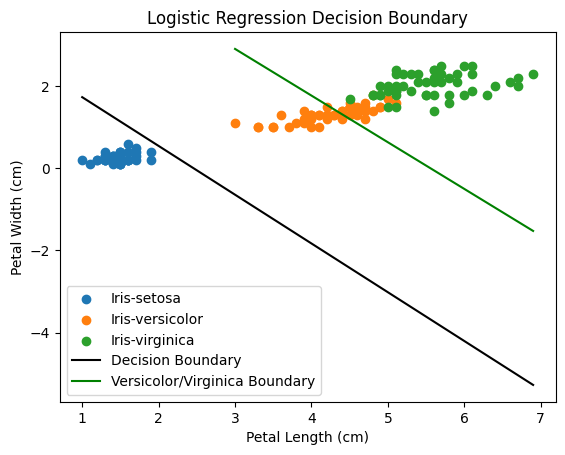

In [ ]:
# training the model

X = data[['petal_length', 'petal_width']].values
y = (data['class'] == 'Iris-setosa').astype(int).values 
model = LogisticRegression(learning_rate=0.01)
model.fit(X, y, num_iterations=2000)
predictions = model.predict(X)
accuracy = np.mean(predictions == y)
print(f'Accuracy: {accuracy * 100:.2f}%')


# training model to seperate between versicolor and virginica 
data_v = data[data['class'] != 'Iris-setosa']
X_v = data_v[['petal_length', 'petal_width']].values
y_v = (data_v['class'] == 'Iris-versicolor').astype(int).values
model_v = LogisticRegression(learning_rate=0.01)
model_v.fit(X_v, y_v, num_iterations=2000)
predictions_v = model_v.predict(X_v)
accuracy_v = np.mean(predictions_v == y_v)
print(f'Accuracy V: {accuracy_v * 100:.2f}%')


# Visualizing decision boundary
for iris_type in iris_types:
    plt.scatter(
        data[x_axis][data['class'] == iris_type],
        data[y_axis][data['class'] == iris_type],
        label=iris_type
    )

x = np.linspace(X[:,0].min(), X[:,0].max(), 100)
y = -(model.theta[0] + model.theta[1]*((x- model.means[0])/model.stds[0])) / (model.theta[2]/model.stds[1] + model.means[1])
x2 = np.linspace(X_v[:,0].min(), X_v[:,0].max(), 100)
y_versi = -(model_v.theta[0] + model_v.theta[1]*((x- model_v.means[0])/model_v.stds[0])) / (model_v.theta[2]/model_v.stds[1] + model_v.means[1])
plt.plot(x, y, color='black', label='Decision Boundary')
plt.plot(x2, y_versi, color='green', label='Versicolor/Virginica Boundary')
plt.xlim(X[:,0].min(), X[:,0].max())
plt.ylim(X[:,1].min(), X[:,1].max())
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()

